In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

from tensorflow.keras import optimizers,Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Conv1D,TimeDistributed,RepeatVector,Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

In [2]:
data = pd.read_excel('data.xlsx',parse_dates=[0])

In [3]:
data.head()

Time  USER   RRC  ERAB  PRB  THR  DUR
0 2016-07-11 00:00:00  1546  1237   989  761  634  662
1 2016-07-11 01:00:00  1170   936   749  576  480  501
2 2016-07-11 02:00:00  1059   847   678  521  434  453
3 2016-07-11 03:00:00  1133   906   725  558  465  485
4 2016-07-11 04:00:00  1185   948   758  583  486  507

In [4]:
data.tail()

Time  USER   RRC  ERAB  PRB  THR  DUR
2851 2017-07-05 19:00:00  1677  1342  1073  826  688  718
2852 2017-07-05 20:00:00  1660  1328  1062  817  681  711
2853 2017-07-05 21:00:00  1942  1554  1243  956  797  831
2854 2017-07-05 22:00:00  1778  1422  1138  875  729  761
2855 2017-07-05 23:00:00  1658  1326  1061  816  680  710

In [5]:
data.describe()

USER          RRC  ...          THR          DUR
count  2856.000000  2856.000000  ...  2856.000000  2856.000000
mean   1612.491246  1290.008403  ...   661.523109   690.310574
std     456.728872   365.393237  ...   187.372499   195.528203
min     645.000000   516.000000  ...   265.000000   276.000000
25%    1278.000000  1022.000000  ...   524.000000   547.000000
50%    1552.000000  1241.500000  ...   636.500000   664.500000
75%    1845.500000  1476.500000  ...   757.250000   790.250000
max    3878.000000  3102.000000  ...  1591.000000  1660.000000

[8 rows x 6 columns]

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    2856 non-null   datetime64[ns]
 1   USER    2856 non-null   int64         
 2   RRC     2856 non-null   int64         
 3   ERAB    2856 non-null   int64         
 4   PRB     2856 non-null   int64         
 5   THR     2856 non-null   int64         
 6   DUR     2856 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 156.3 KB
None


In [7]:
data.isnull().sum()

Time    0
USER    0
RRC     0
ERAB    0
PRB     0
THR     0
DUR     0
dtype: int64

In [8]:
data.shape

(2856, 7)

In [9]:
data.dtypes

Time    datetime64[ns]
USER             int64
RRC              int64
ERAB             int64
PRB              int64
THR              int64
DUR              int64
dtype: object

In [10]:
print('Number of rows :-',data.shape[0])
print('Number of columns :-',data.shape[1])

Number of rows :- 2856
Number of columns :- 7


In [11]:
data1=data.set_index('Time',drop=True)

In [12]:
data1.head()

USER   RRC  ERAB  PRB  THR  DUR
Time                                                
2016-07-11 00:00:00  1546  1237   989  761  634  662
2016-07-11 01:00:00  1170   936   749  576  480  501
2016-07-11 02:00:00  1059   847   678  521  434  453
2016-07-11 03:00:00  1133   906   725  558  465  485
2016-07-11 04:00:00  1185   948   758  583  486  507

## EDA.

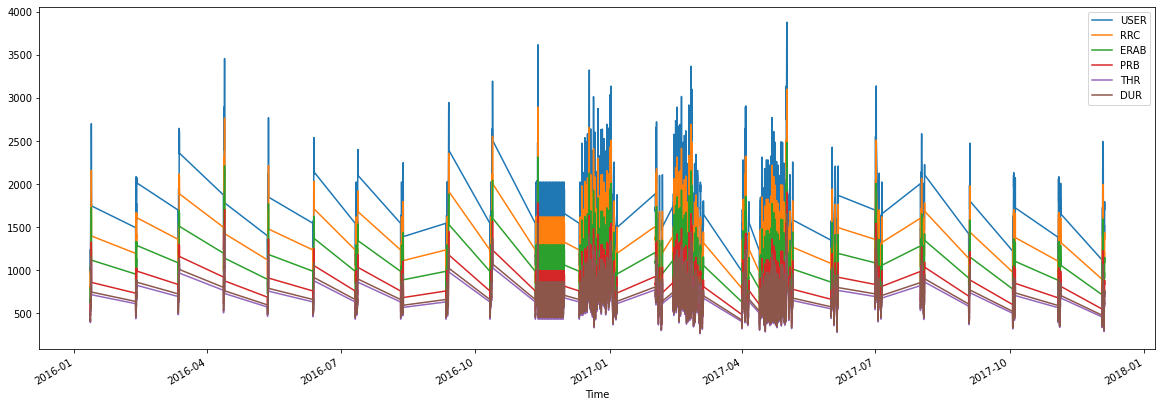

In [13]:
data1.plot(figsize=(20,7))
plt.show()

In this we can see every features are moving in same trend.In between the 2017,Jan and 2017 june is very dense with data and USER is also getting increase in this year period so due to this all the parameter is getting decrease.It means the feature highly correlated to each other.

# Moving Average of This series .

Here if we see the I have taken the 20 days mean observation that can us better understanding of data.If we see the data is increase and decrasing along with the USER.In the 2017 at begnning the the USER got increase and at end of year the  quantity of USER is getting decrease.

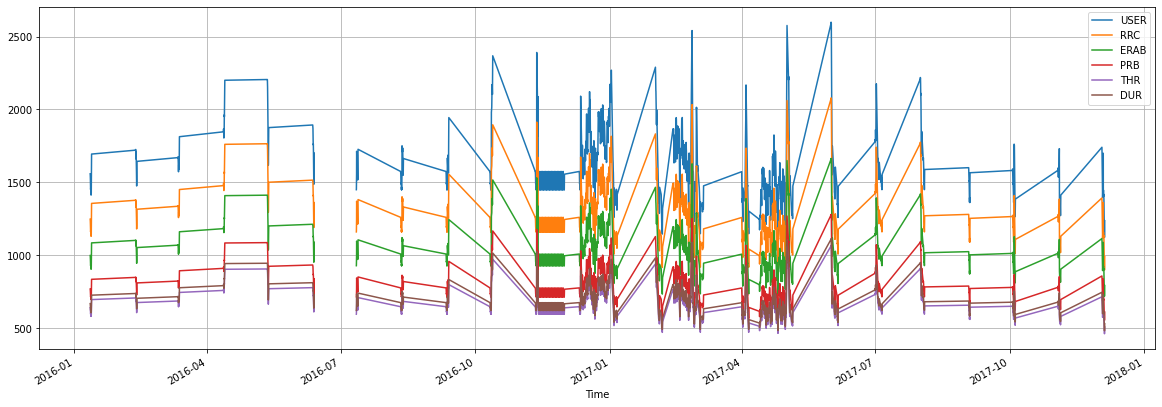

In [ ]:
data1.rolling(window=20).mean().plot(figsize=(20,7))
plt.grid()
plt.show()

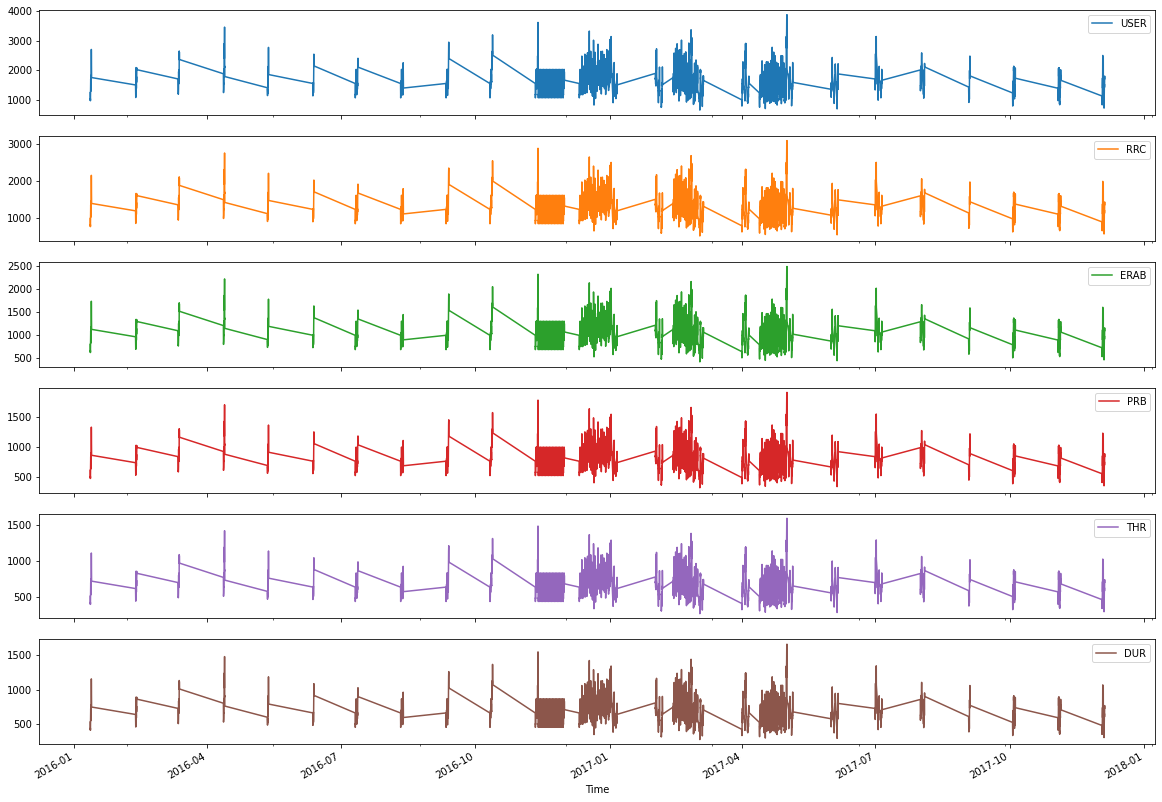

In [ ]:
data1.plot(subplots=True,figsize=(20,15))
plt.show()

In the above deatail flow of data along time indiviually.

## Histogram of each Parameter.

In this we can all the is right skewed and it all feature having good amount information.It can help us to determine to which features containing the information from that we easily understand the which feature is important.

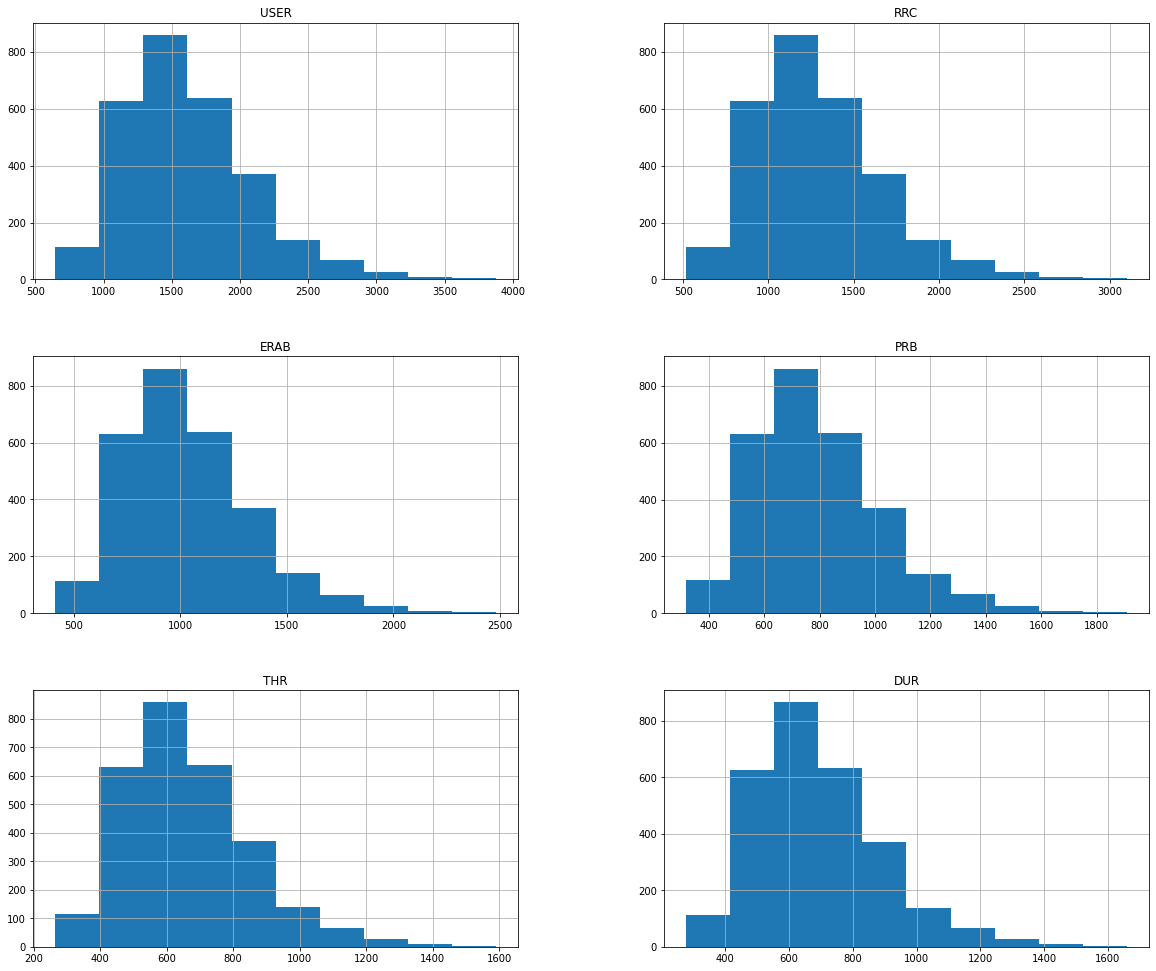

In [ ]:
data.hist(figsize=(20,17))
plt.show()

## Gaussian Distribution

In this we can see the how much data is in skewed and how much each feture is important.

In [ ]:
def distribution(data):
  for i in data.columns:
    print(f'Distribution :- {i}')
    plt.figure(figsize=(20,6))
    ax = sns.kdeplot(data[i],color='teal',shade=True)
    sns.distplot(data[i],color='g')
    plt.show()
    print()
    print()

Distribution :- USER


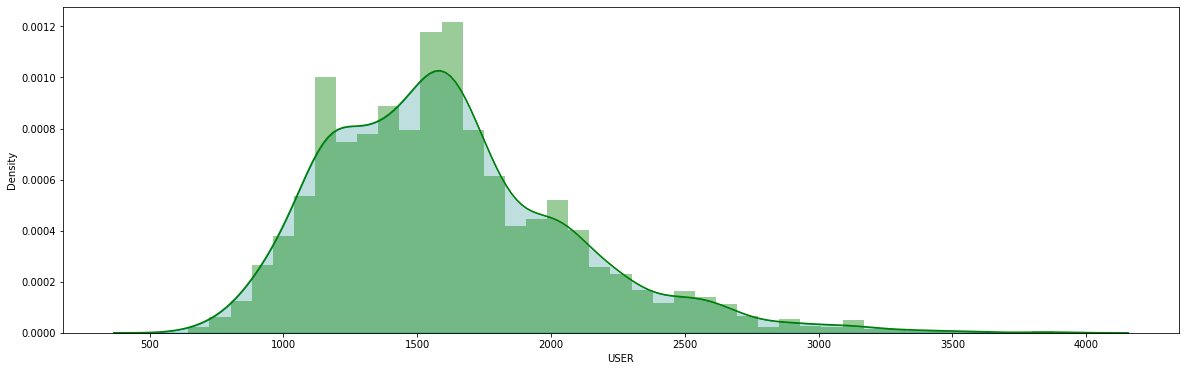



Distribution :- RRC


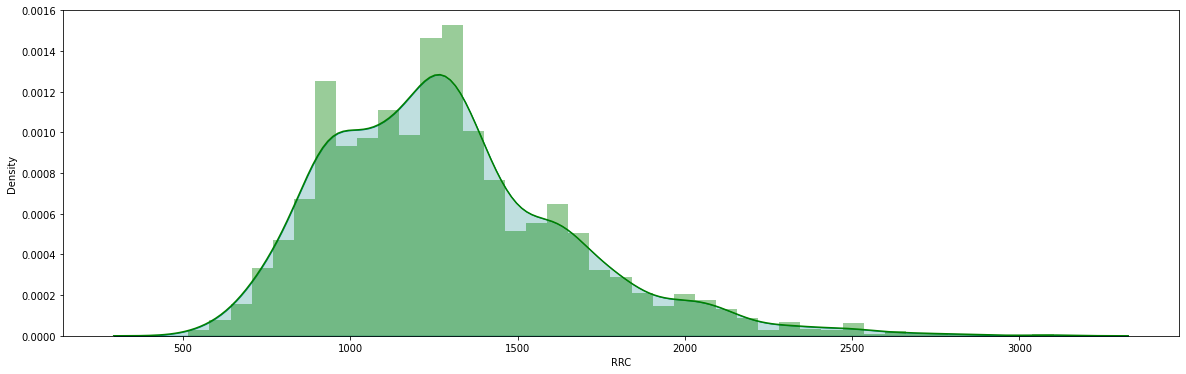



Distribution :- ERAB


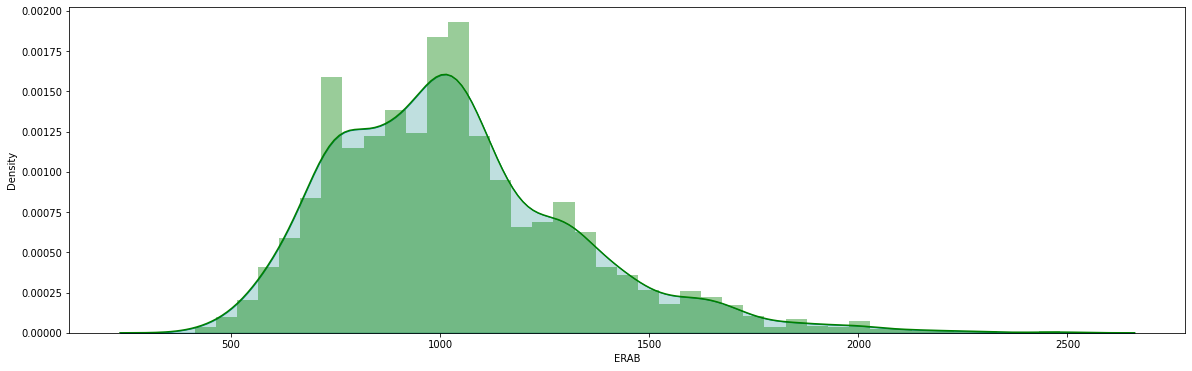



Distribution :- PRB


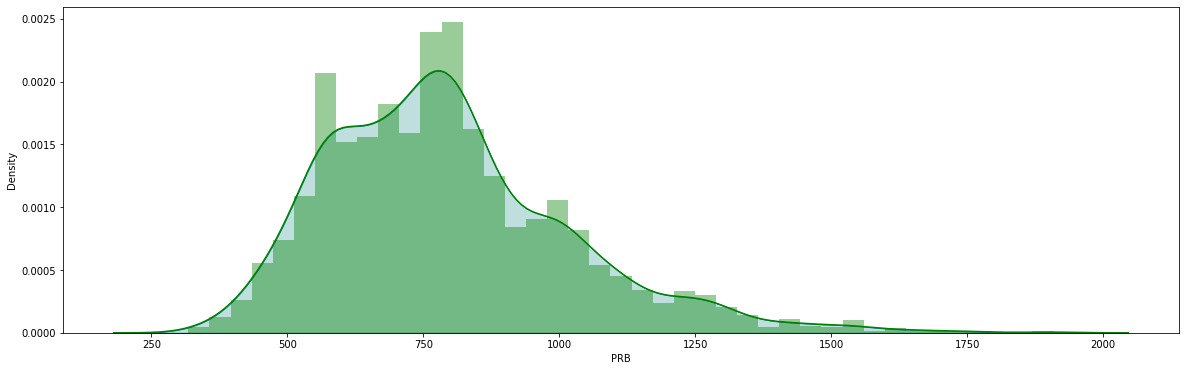



Distribution :- THR


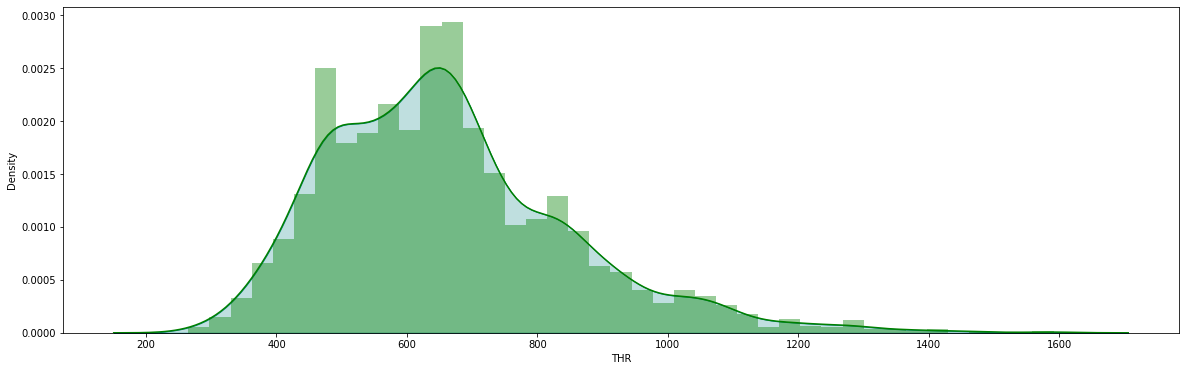



Distribution :- DUR


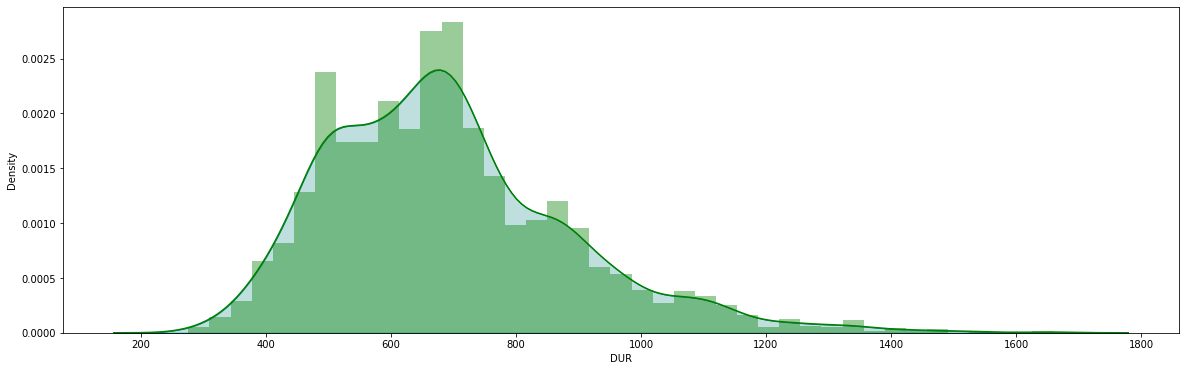

In [ ]:
distribution(data1)

From the above we can see the data is not so much skewed

In [14]:
def PLot_for_timeseries(input_data):
  for i in data:
    if data[i].dtypes=='int64':
      fig = px.line(input_data, x='Time', y=i, title=f'Time Series of {i} with Distribution along the date')
      fig.update_xaxes(
          rangeslider_visible=True,
          rangeselector=dict(
              buttons=list([
              dict(count=1, label="1year", step="year", stepmode="backward"),
              dict(count=1, label="2year", step="year", stepmode="backward"),
              dict(step="all")
              ])
              ))
      fig.show()

            
      print()
      print()
      print()
    else:
      print('Sorry.')

In [15]:
PLot_for_timeseries(data)

Sorry.


# Here is Correlation in between feature of data.

In [ ]:
cormat = data1.corr()
cormat

USER       RRC      ERAB       PRB       THR       DUR
USER  1.000000  1.000000  1.000000  0.999999  0.999999  0.999999
RRC   1.000000  1.000000  0.999999  0.999999  0.999999  0.999999
ERAB  1.000000  0.999999  1.000000  0.999999  0.999998  0.999998
PRB   0.999999  0.999999  0.999999  1.000000  0.999998  0.999998
THR   0.999999  0.999999  0.999998  0.999998  1.000000  0.999998
DUR   0.999999  0.999999  0.999998  0.999998  0.999998  1.000000

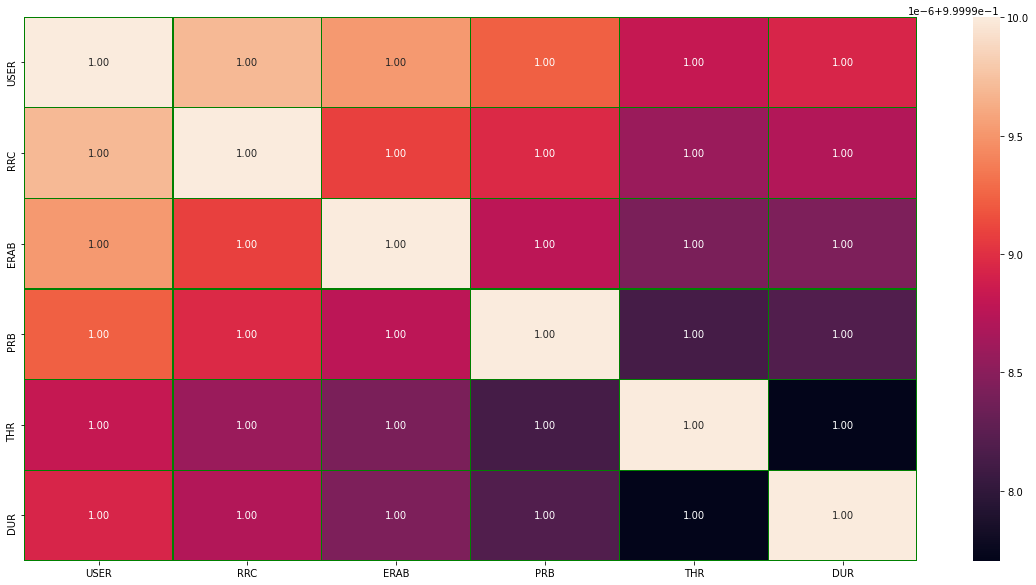

In [ ]:
plt.figure(figsize=(20,10))
g = sns.heatmap(cormat,annot=True,fmt='.2f',linecolor='g',linewidths=0.4)
plt.show()

<Figure size 1440x1440 with 0 Axes>

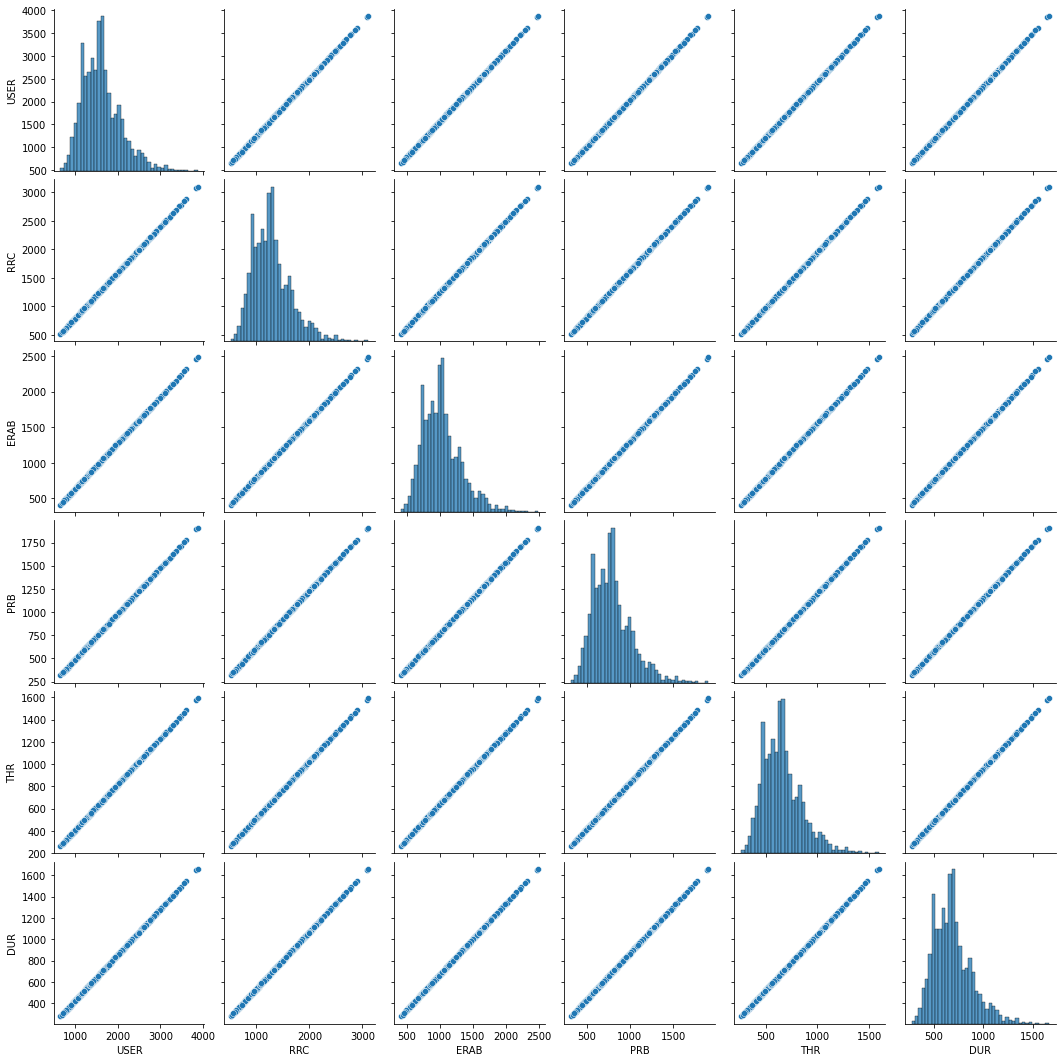

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data1)
plt.show()

**If we see from above the all features are highly correlated to each that means here all feature are highly important.**

## We will some more informative EDA so that will get to know all behaviour of the data.


**Here we can see the data is flowing is hourly frequency.**

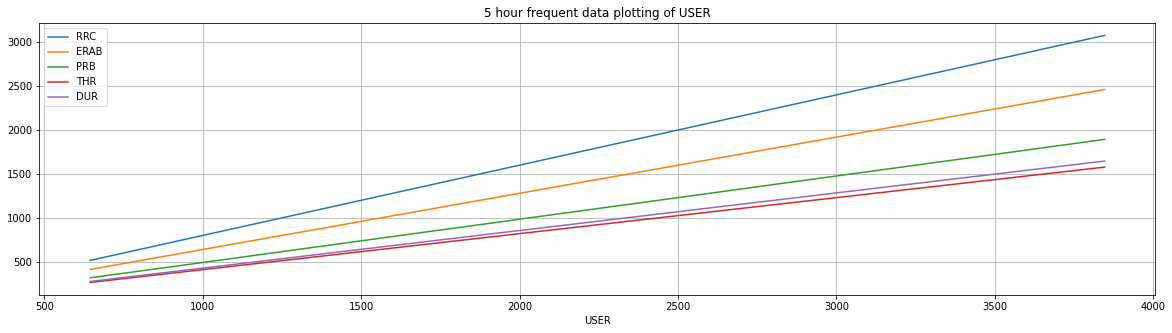

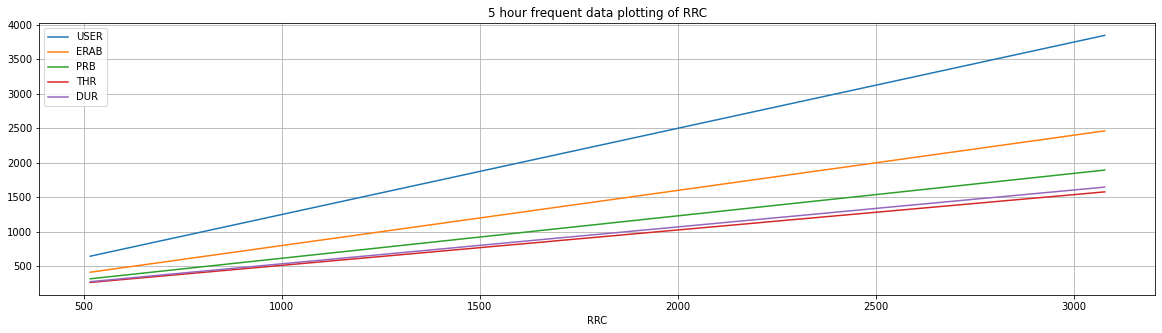

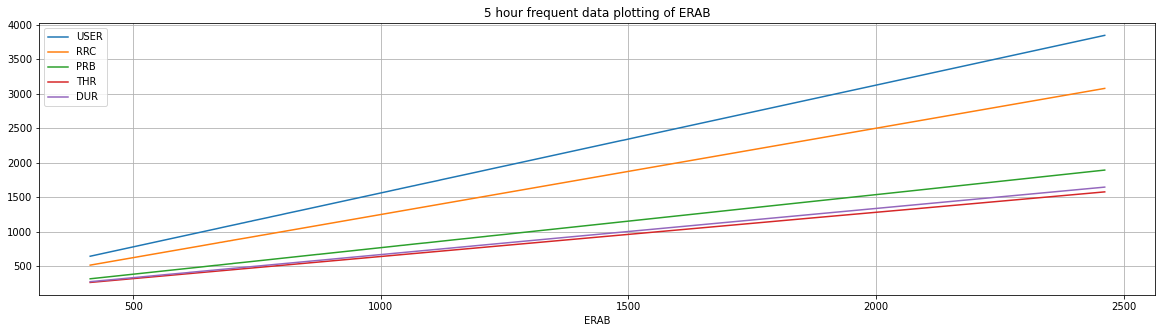

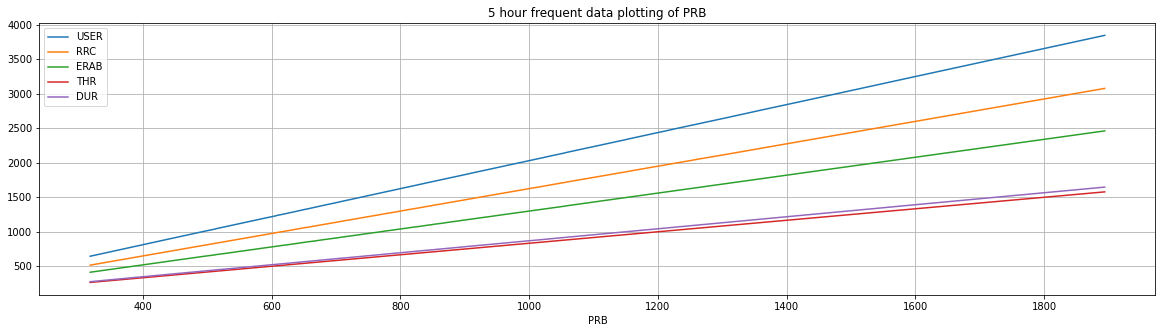

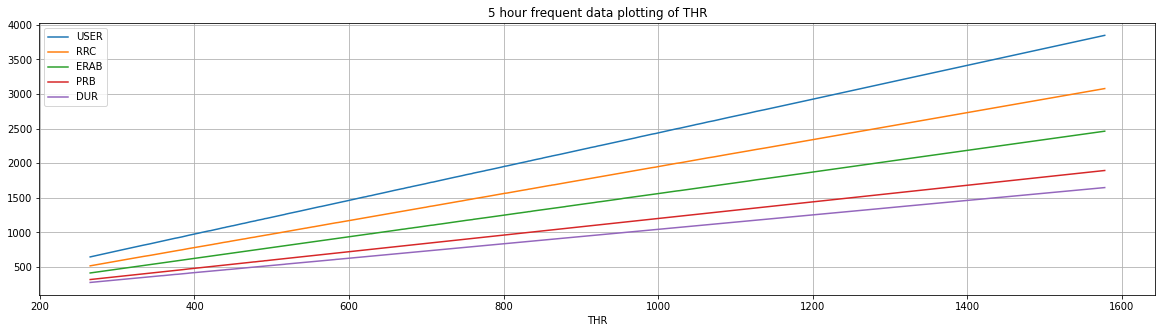

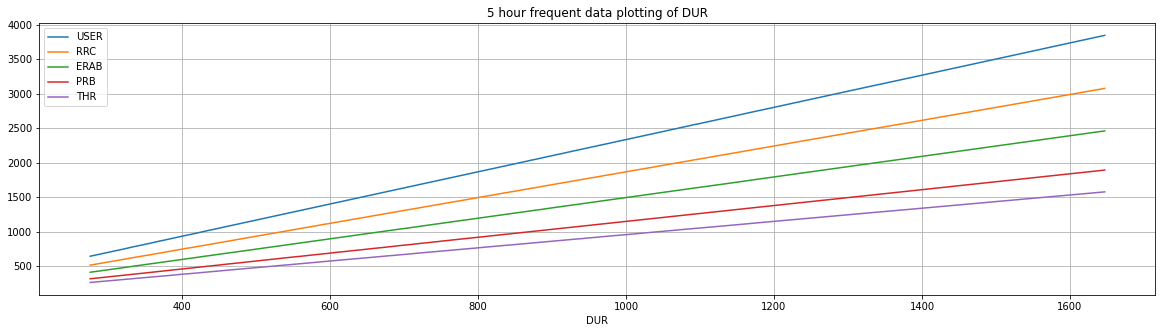

In [16]:
for i in data1:
  data1.asfreq('5H').groupby(by=i).mean().plot(kind='line',figsize=(20,5),title=f'5 hour frequent data plotting of {i}')
  plt.grid()
  print()

In [17]:
data2017=data1.loc['2017']
data2016 =data1.loc['2016']

**Here we can how much data is proportional with USER in 2017**

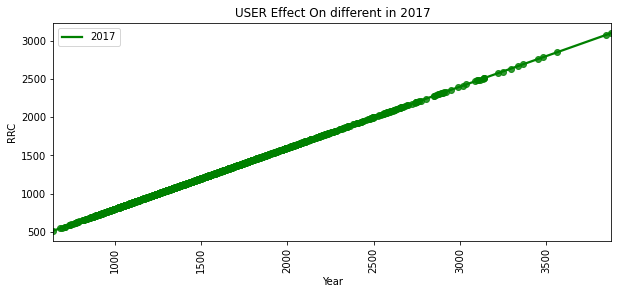

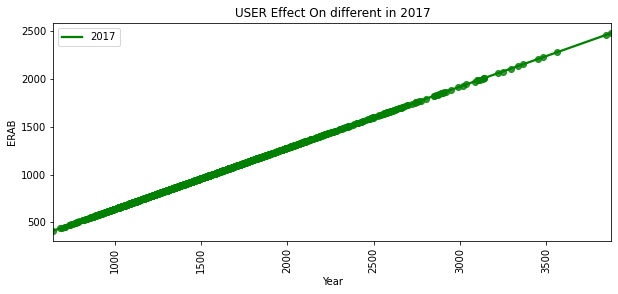

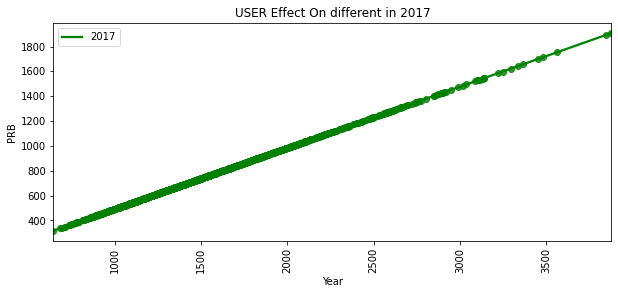

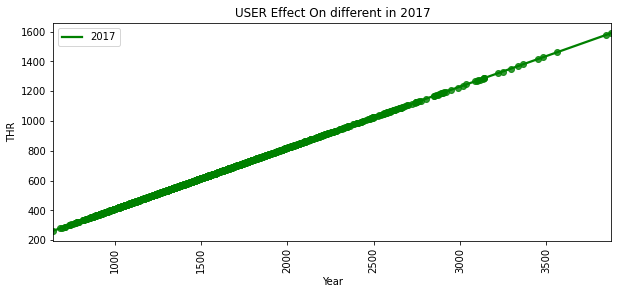

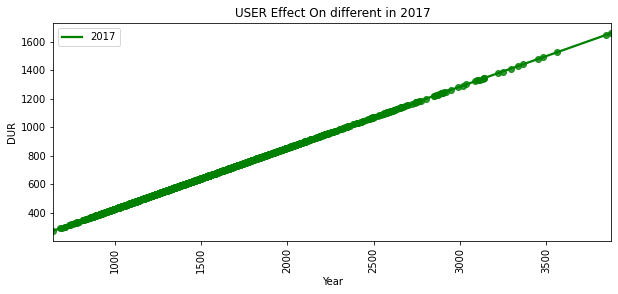

In [22]:
for i in data2017:
  if i!='USER':
    plt.figure(figsize=(10,4))
    sns.regplot(data2017['USER'],data2017[i],color='g')
    plt.legend(['2017'])
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}')
    plt.title('USER Effect On different in 2017')
    plt.show()

**Here we can how much data is proportional with USER in 2016**

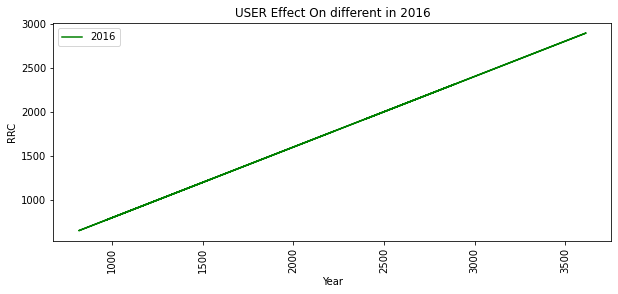

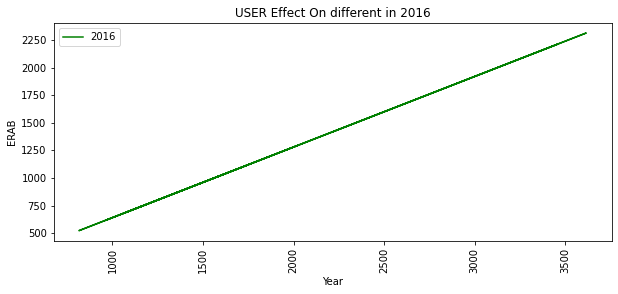

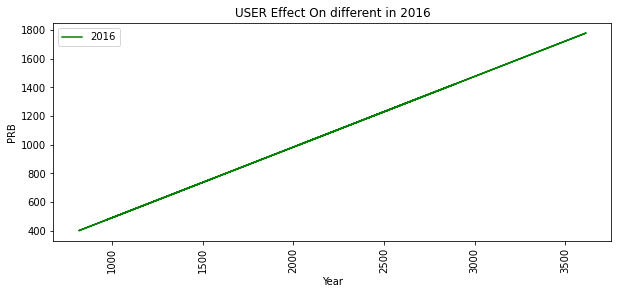

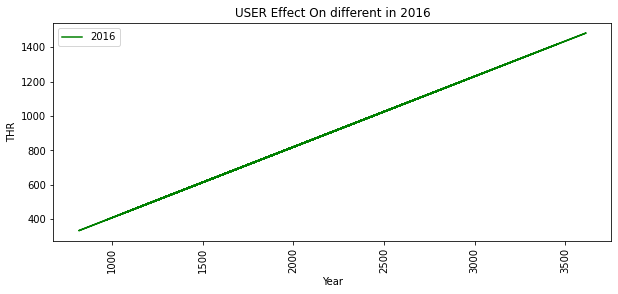

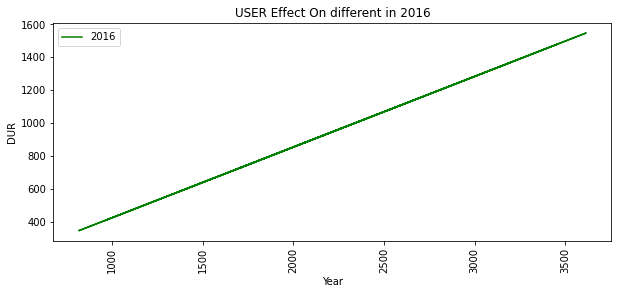

In [19]:
for i in data2016:
  if i!='USER':
    plt.figure(figsize=(10,4))
    plt.plot(data2016['USER'],data2016[i],color='g')
    plt.legend(['2016'])
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel(f'{i}')
    plt.title('USER Effect On different in 2016')

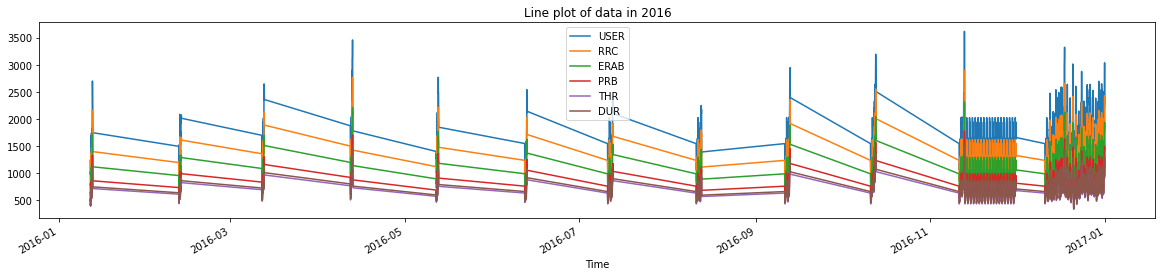

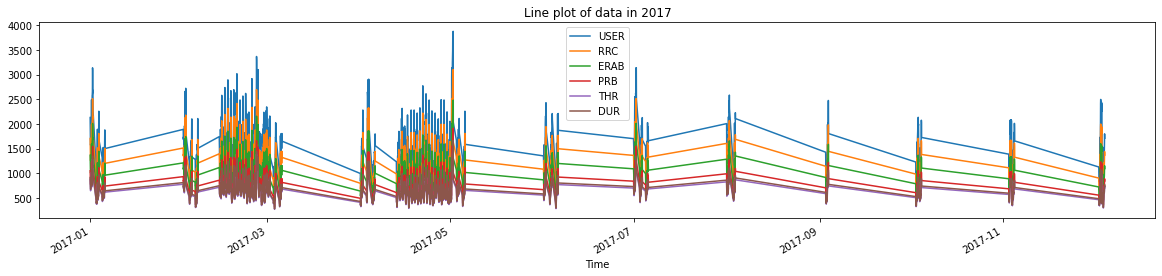

In [20]:
data2016.plot(figsize=(20,4),title='Line plot of data in 2016')
plt.show()
data2017.plot(figsize=(20,4),title='Line plot of data in 2017' )
plt.show()

Here we can see at the end of dec,2016,Jan of 2017 ,March of 2017 and May of 2017. The USER had increased.

If I comined the two series of 2016 and 2017 then flow of data and distribution seems like same.

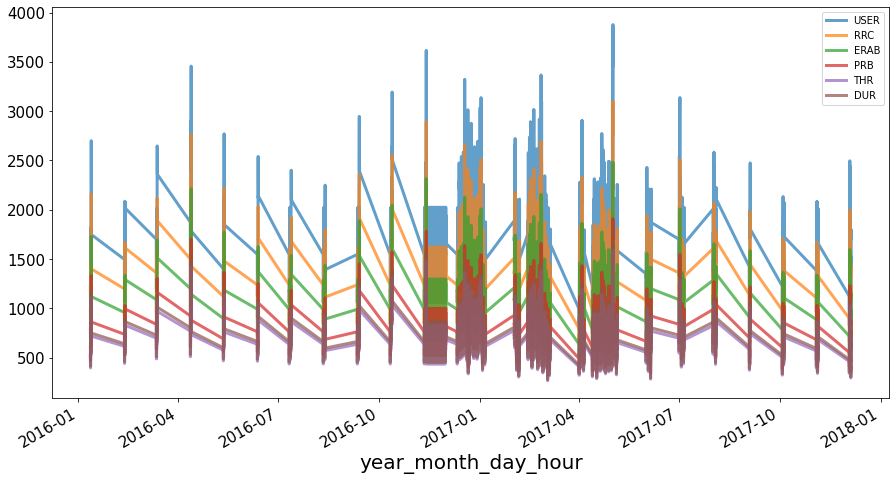

In [26]:
data14_15 = data1['2016':'2017'][list(data1.columns)]
data14_15.plot(figsize=(15,8),linewidth=3,fontsize=15,alpha=0.7)
plt.xlabel('year_month_day_hour',fontsize=20)
plt.show()

## Autocorrelation Plot.

Autocorrelation plot for USER



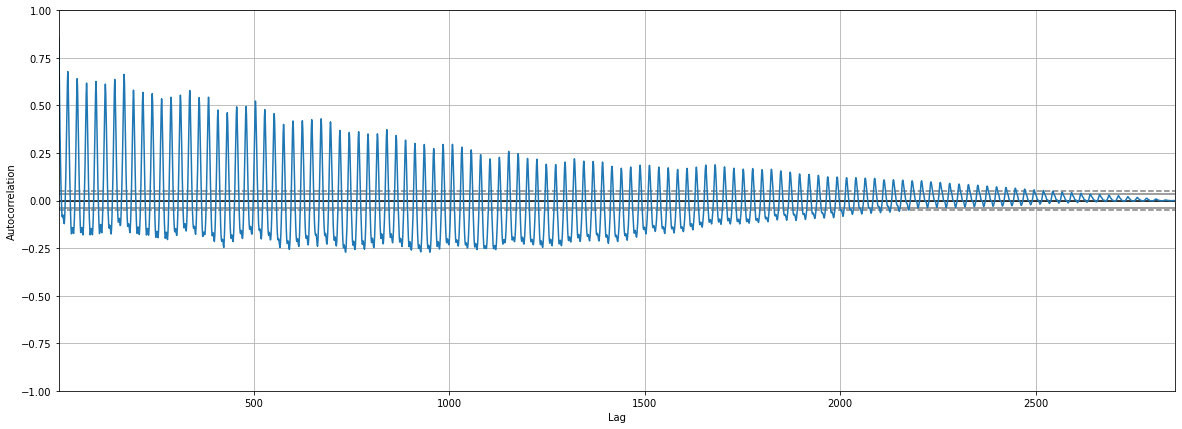



Autocorrelation plot for RRC



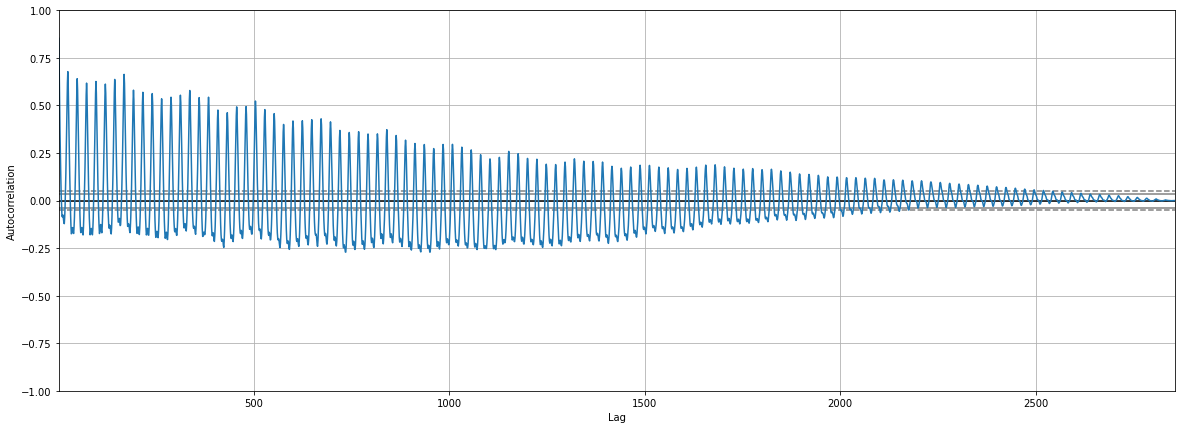



Autocorrelation plot for ERAB



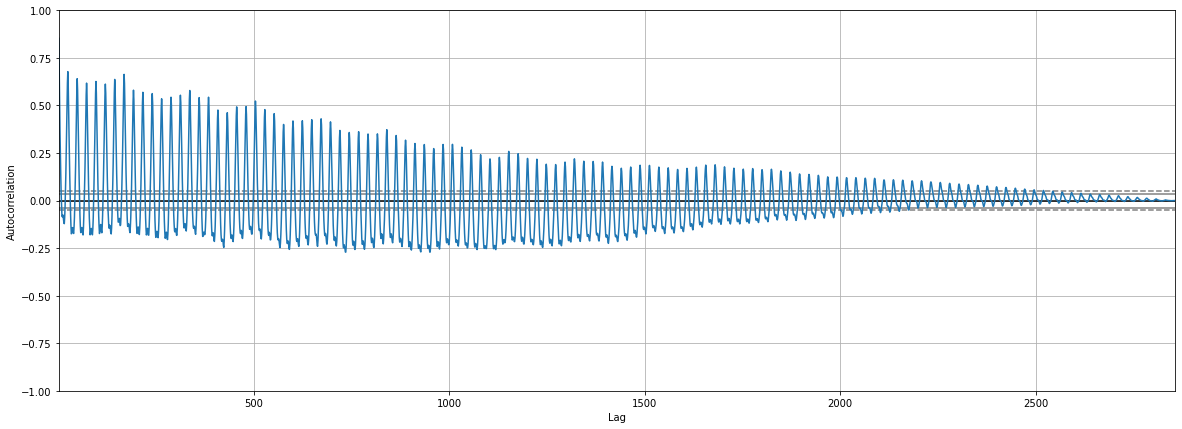



Autocorrelation plot for PRB



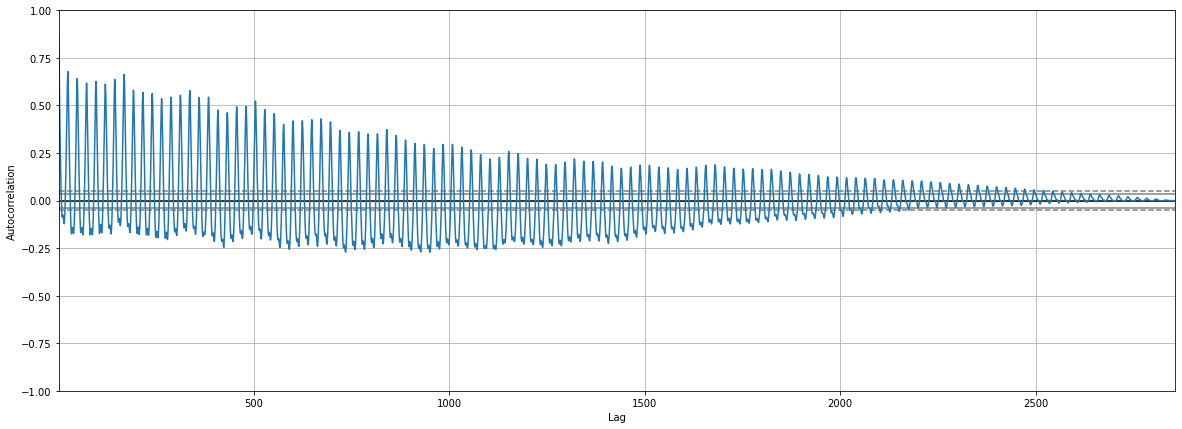



Autocorrelation plot for THR



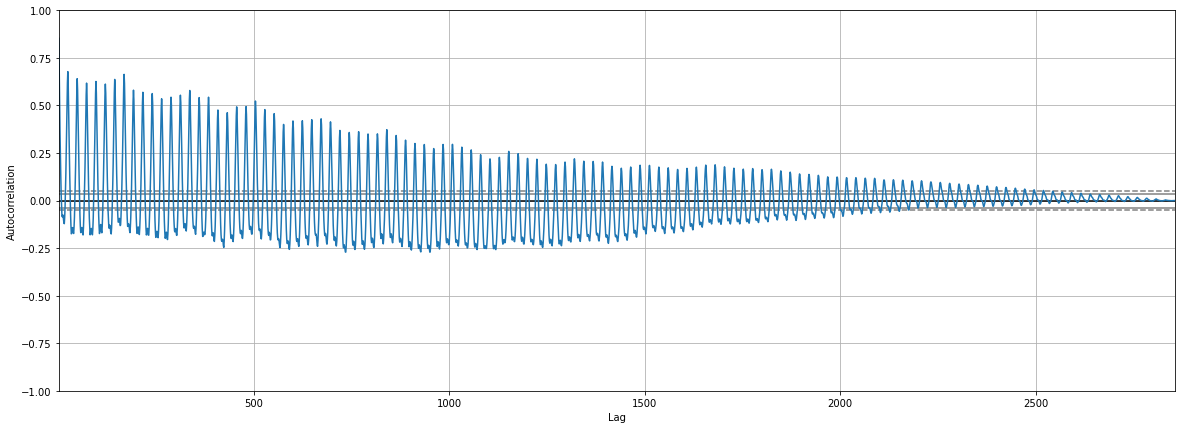



Autocorrelation plot for DUR



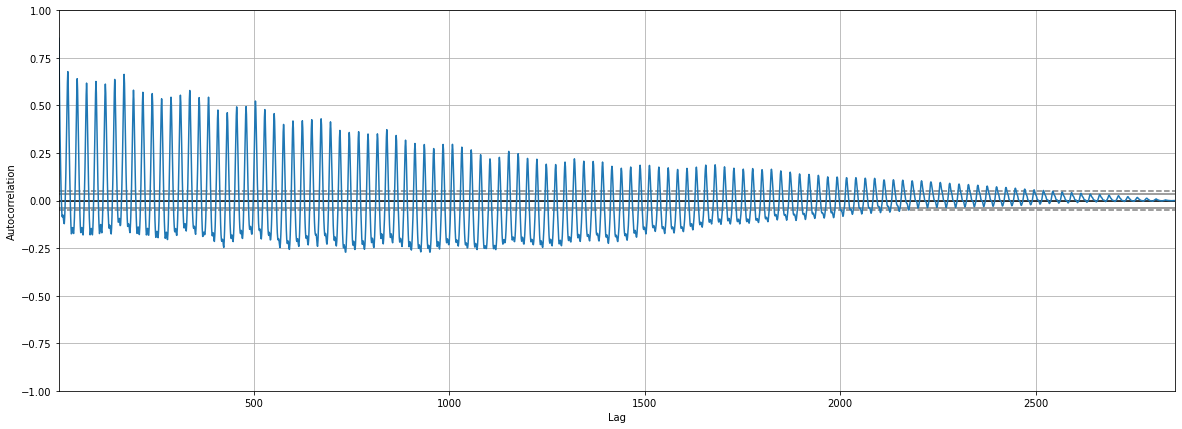

In [27]:
for i in data1:
  print(f'Autocorrelation plot for {i}')
  print()
  plt.figure(figsize=(20,7))
  pd.plotting.autocorrelation_plot(data1['2016':'2017'][i])
  plt.show()
  print()
  print()

In [28]:
monthly_sample = data1.resample('M').mean()

Autocorrelation plot for USER



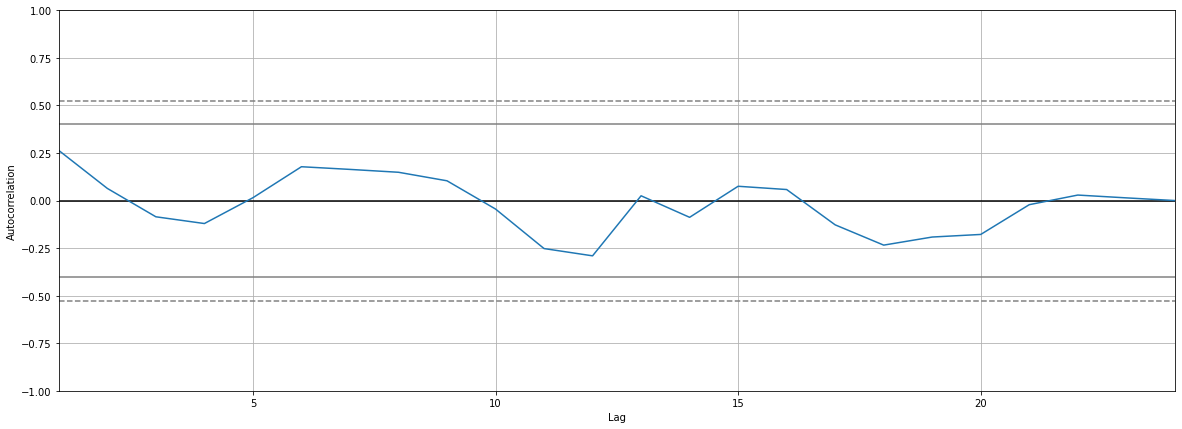



Autocorrelation plot for RRC



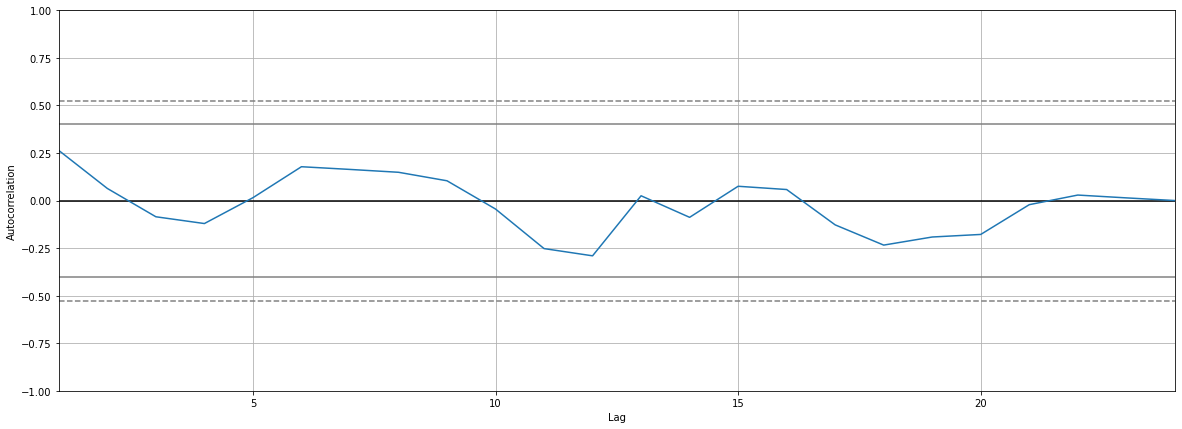



Autocorrelation plot for ERAB



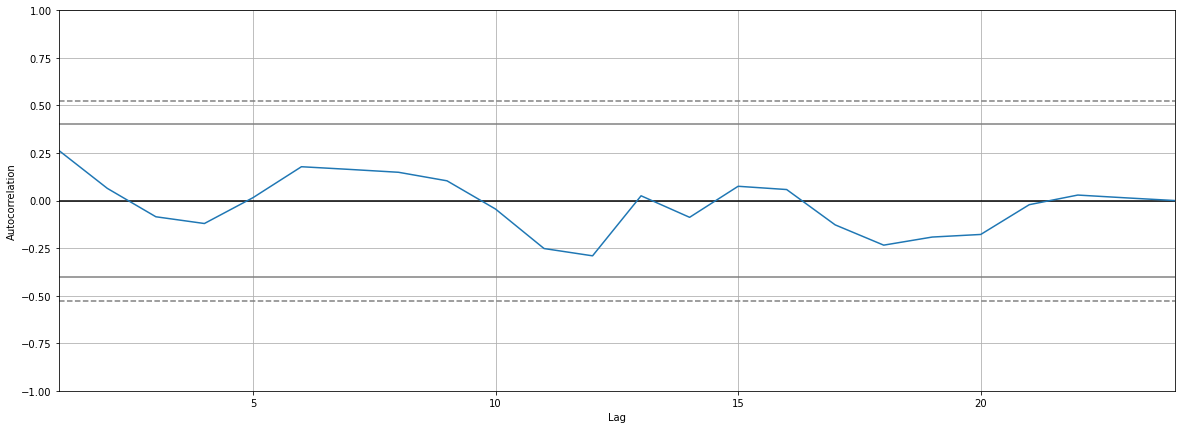



Autocorrelation plot for PRB



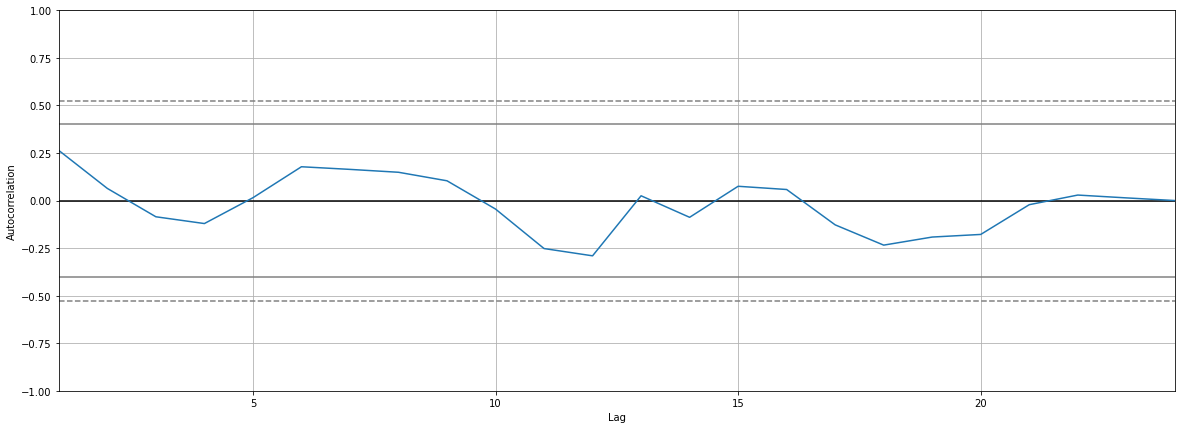



Autocorrelation plot for THR



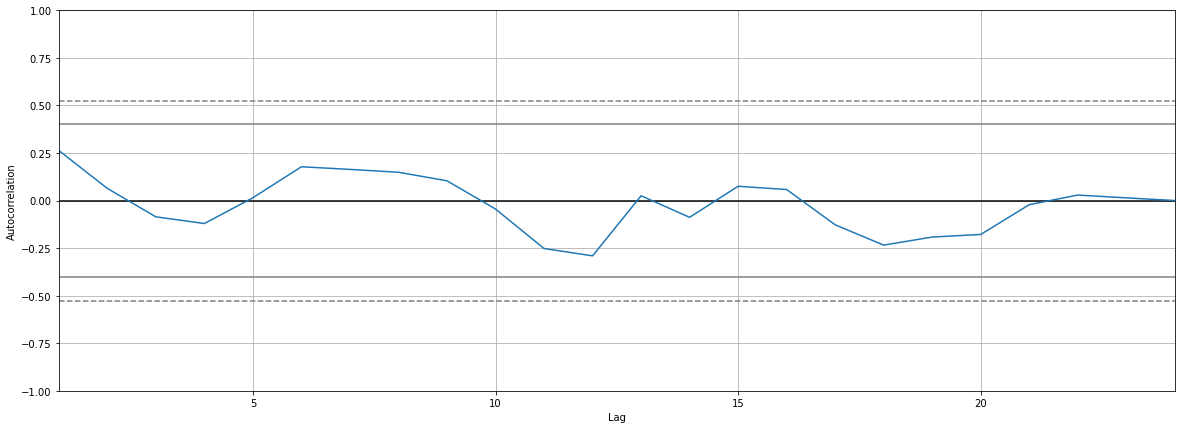



Autocorrelation plot for DUR



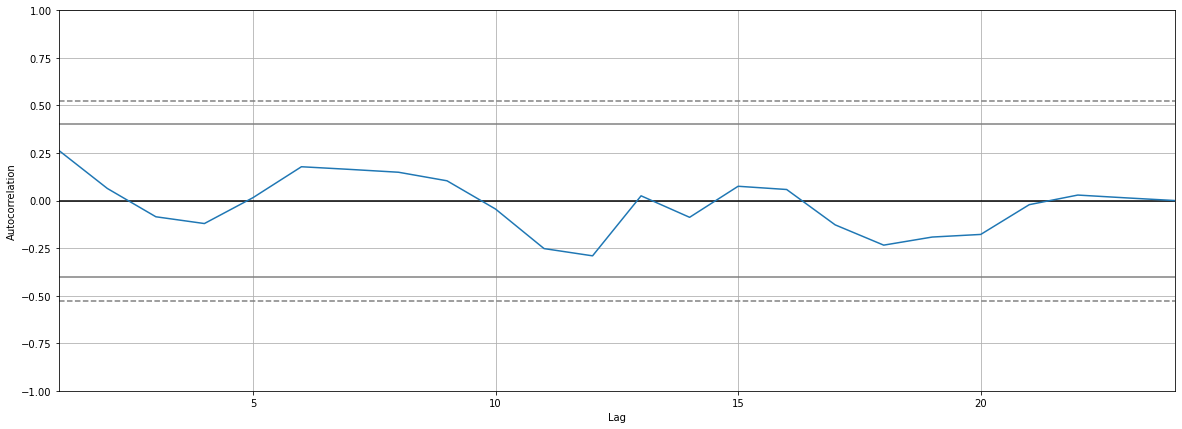

In [29]:
for i in data1:
  print(f'Autocorrelation plot for {i}')
  print()
  plt.figure(figsize=(20,7))
  pd.plotting.autocorrelation_plot(monthly_sample['2016':'2017'][i])
  plt.show()
  print()
  print()
  #Now it is pretty much clear
# The grey color line is the cofidence interval
#It is showing two year seasonality
#Strong lines (Grey) is the 90% of confidece interval
#AS the dotted line is the 95% of the cofidence interval.
#Grey line shows the straight of the relationship

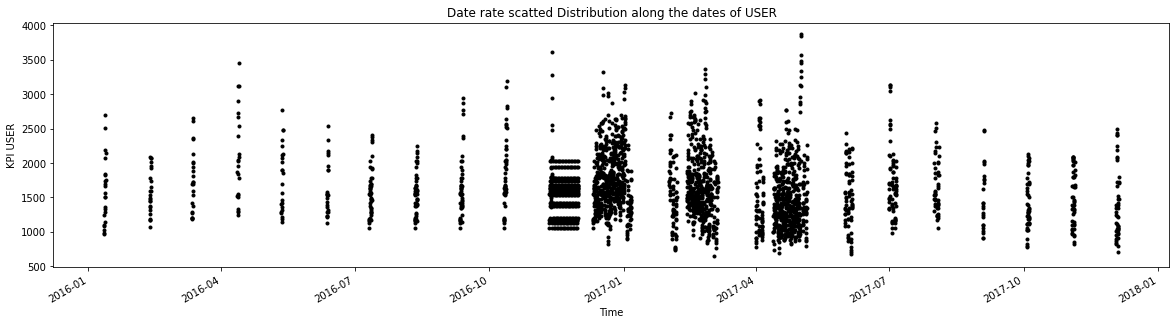

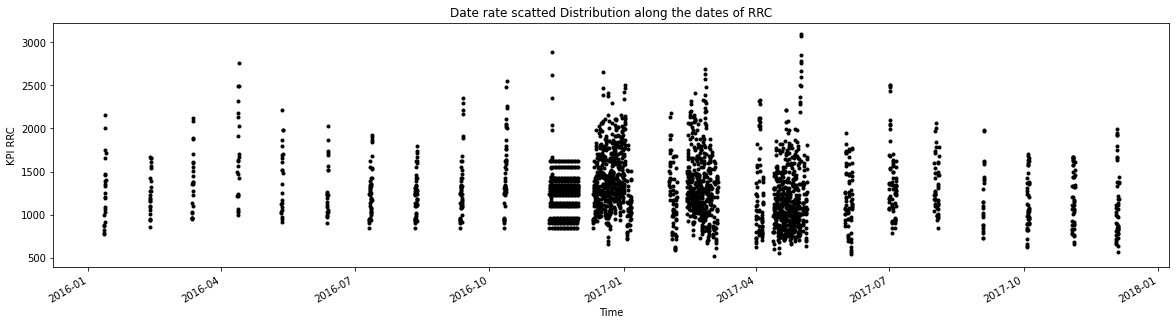

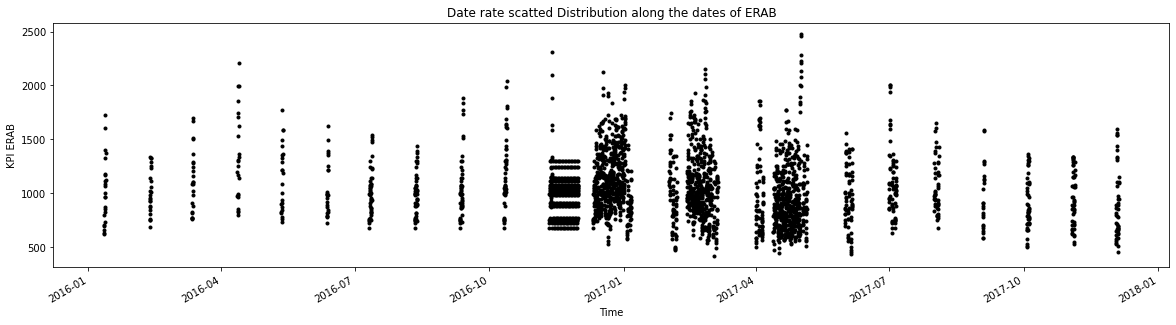

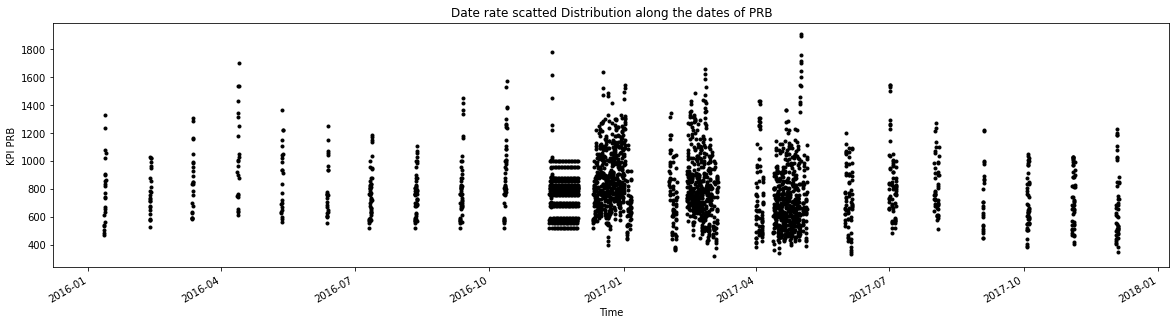

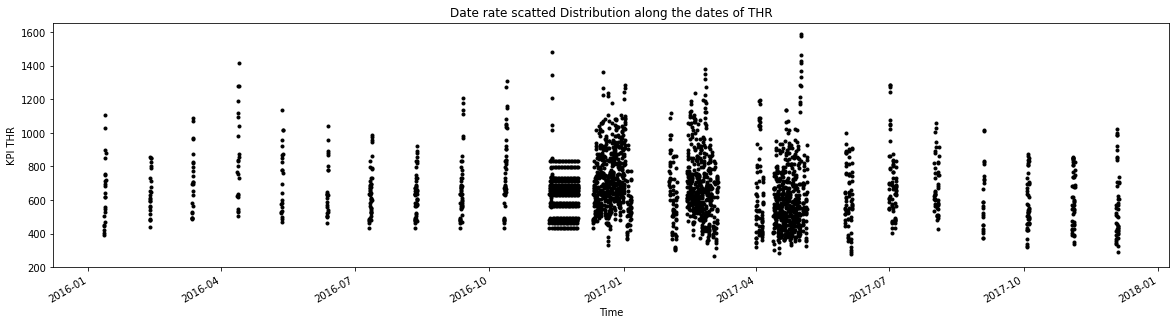

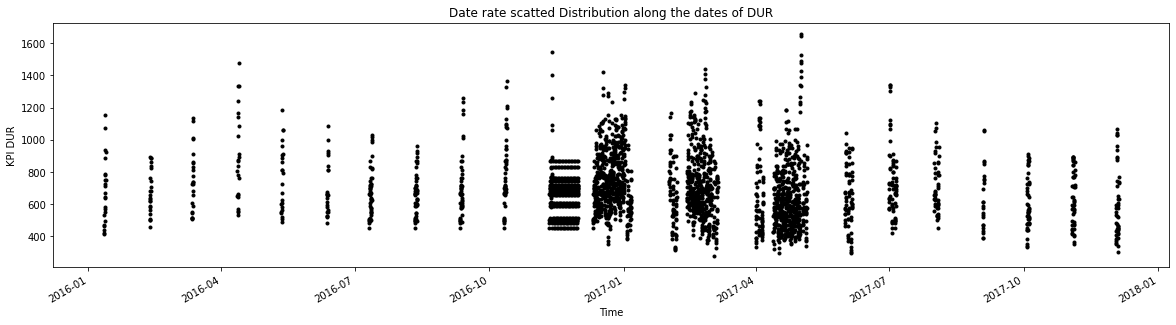

In [30]:
for i in data1:
  data1[i].plot(style='.k',figsize=(20,5),title=f'Date rate scatted Distribution along the dates of {i}')
  plt.xlabel('Time',fontsize=10)
  plt.ylabel(f'KPI {i}',fontsize=10)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.show()

## To understand wheather all Series are stationary or not.

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def is_stationary(add_data):
  for i in data:
    if data[i].dtypes=='int' or data[i].dtypes =='float':
      from statsmodels.tsa.stattools import adfuller
      adf_score,p_values,usedlag,nobs,icbest,Restrore = adfuller(data[i],regression='c', autolag='AIC',)

      if p_values>=0.05:
        print('This Series is Seasonal Series.')
      else:
        print(f'{i} Series is stationary Series.')

        print()
        print()

In [ ]:
is_stationary(data1)

USER Series is stationary Series.


RRC Series is stationary Series.


ERAB Series is stationary Series.


PRB Series is stationary Series.


THR Series is stationary Series.


DUR Series is stationary Series.




In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
def Decomposition_data(input_data):
  for i in input_data:
    print(f'This is for {i}')
    decompose = seasonal_decompose(input_data[i],model='additive',freq=50)
    fig = decompose.plot()
    print()
    print()
    original = decompose.observed
    original.plot(figsize=(10,5),title=f'Original Data Distribution for {i}.',color='teal')
    plt.show()
    trend = decompose.trend
    trend.plot(figsize=(10,5),title=f'Trend Distribution for the {i}',color='g')
    plt.show()
    seasonal = decompose.seasonal
    seasonal.plot(figsize=(10,5),title=f'Seasonal Distribution for the {i}.',color='b')
    plt.show()
    Residual = decompose.resid
    Residual.plot(figsize=(10,5),title=f'Residual Distribution for the {i}',color='r')
    plt.show()

This is for USER




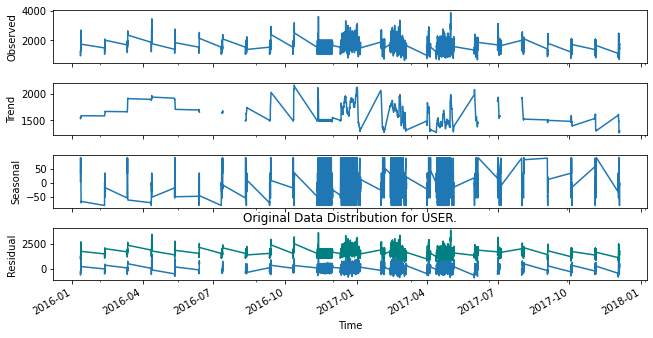

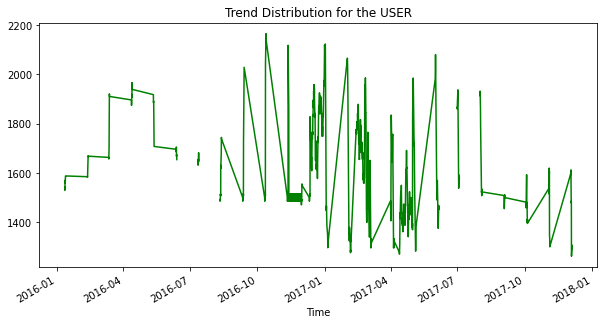

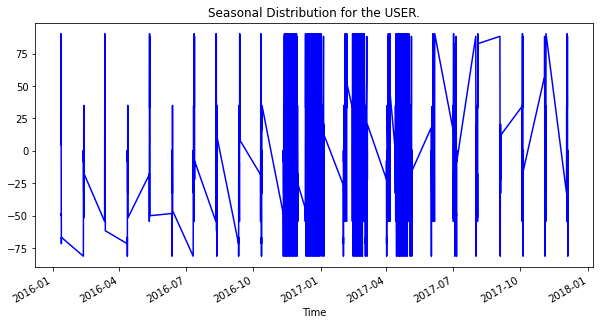

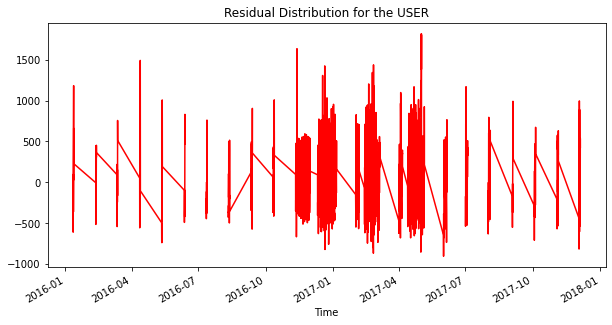

This is for RRC




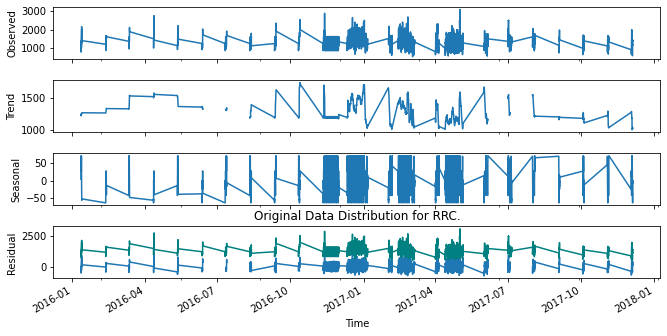

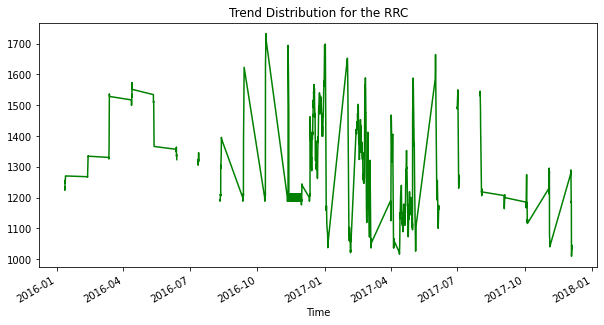

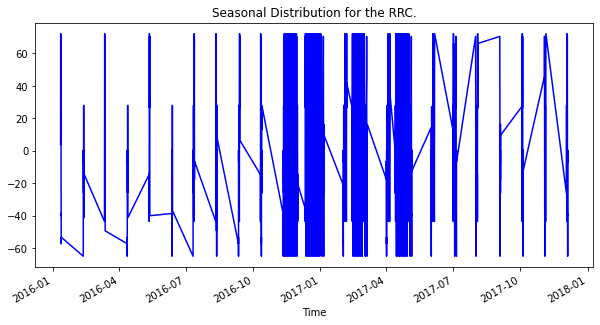

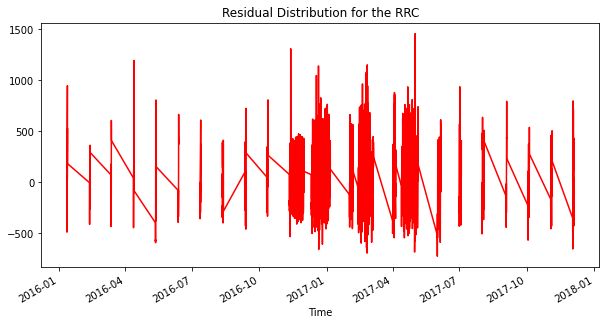

This is for ERAB




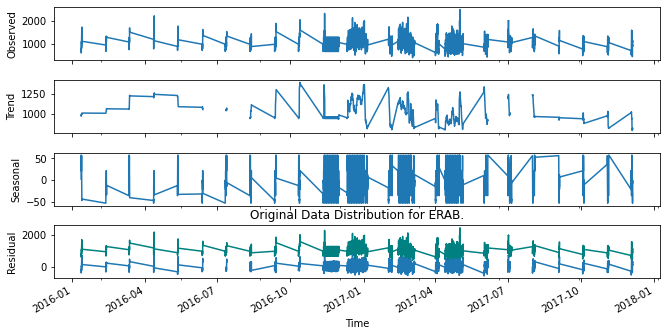

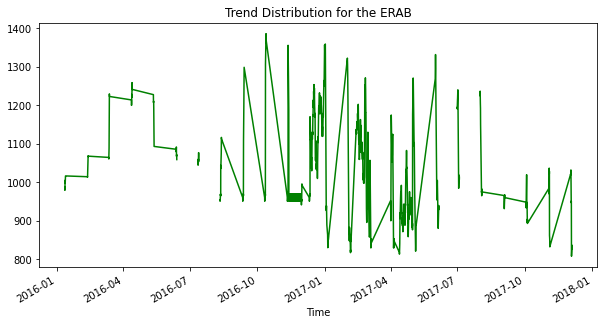

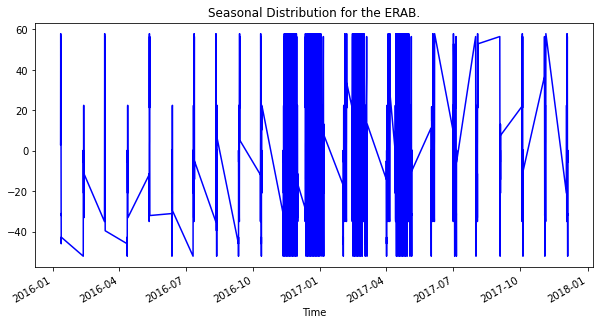

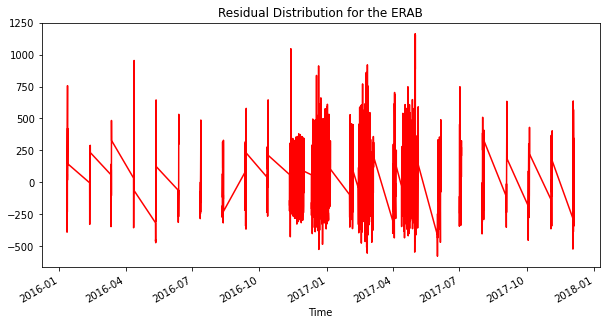

This is for PRB




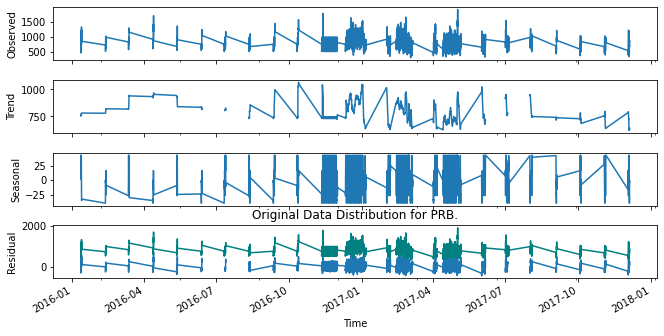

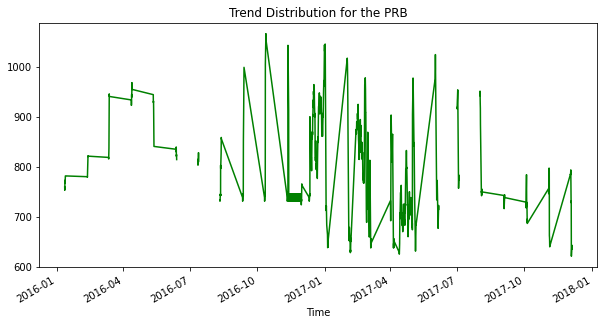

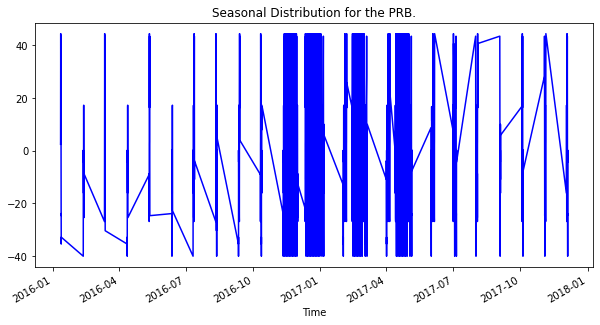

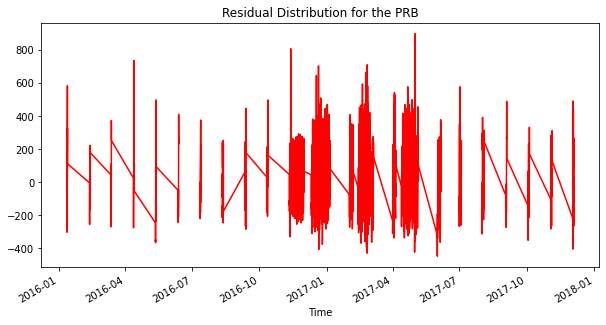

This is for THR




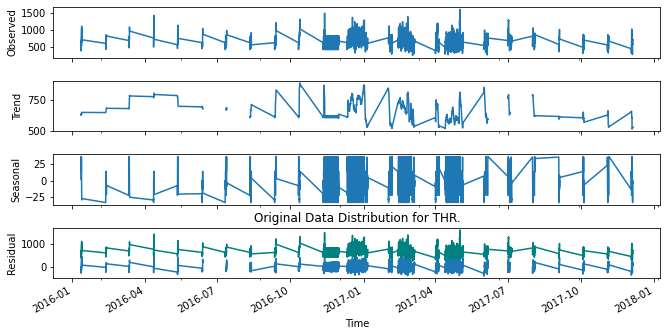

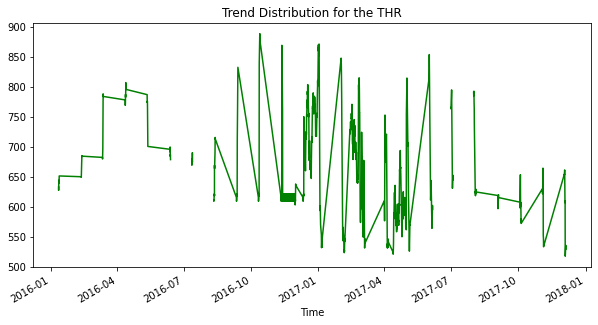

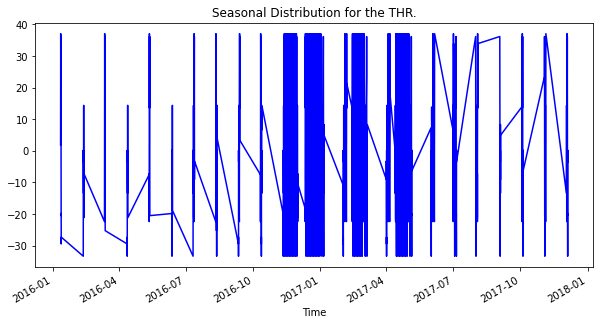

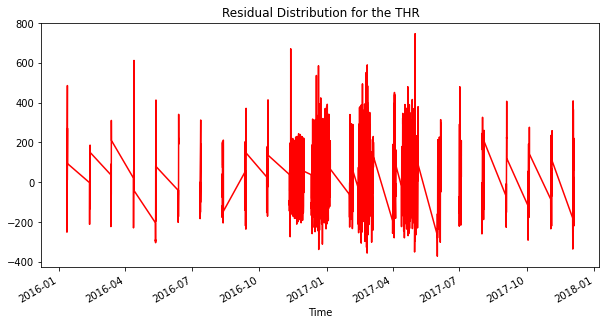

This is for DUR




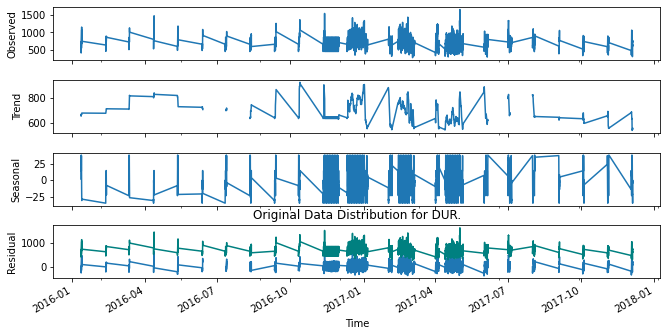

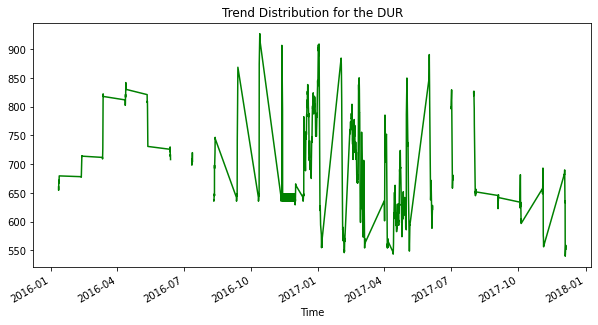

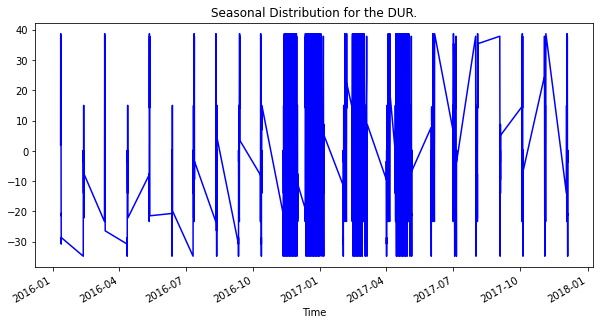

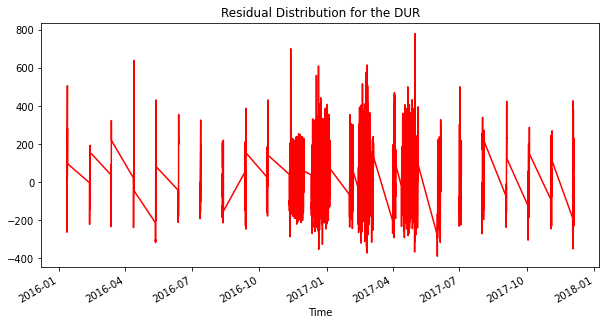

In [37]:
  Decomposition_data(data1)

In [63]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
for i in data:
  if i!='Time':
    fig = px.histogram(data, x="Time", y=i, histfunc="avg", title=f"Histogram User {i}")
    fig.update_traces(xbins_size="M1")
    fig.update_xaxes(showgrid=True, dtick="M1", tickformat="%b\n%Y")
    fig.update_layout(bargap=0.1)
    fig.add_trace(go.Scatter(mode="markers", x=data["Time"], y=data[i], name="daily"))
    fig.show()

Thank You !!